In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Load the data**


In [2]:
data = pd.read_csv('/content/mcdonalds.csv')

In [3]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [8]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [9]:
data.shape

(1453, 15)

In [10]:
data.isnull()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [12]:
data.replace({'Yes': 1, 'No': 0}, inplace=True)

In [13]:
data.dropna(subset=['VisitFrequency', 'Like'], inplace=True)

In [14]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


 **Mapping VisitFrequency to numeric values**

In [15]:
visit_freq_mapping = {
    'More than once a week': 5,
    'Once a week': 4,
    'Once a month': 3,
    'Every three months': 2,
    'Once a year': 1,
    'Never': 0
}
data['VisitFrequency'] = data['VisitFrequency'].map(visit_freq_mapping)

In [16]:
data['Like'] = pd.to_numeric(data['Like'], errors='coerce')

**Encode categorical variables**

In [17]:
le = LabelEncoder()
for col in ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency', 'Gender']:
    data[col] = le.fit_transform(data[col])

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age']])

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

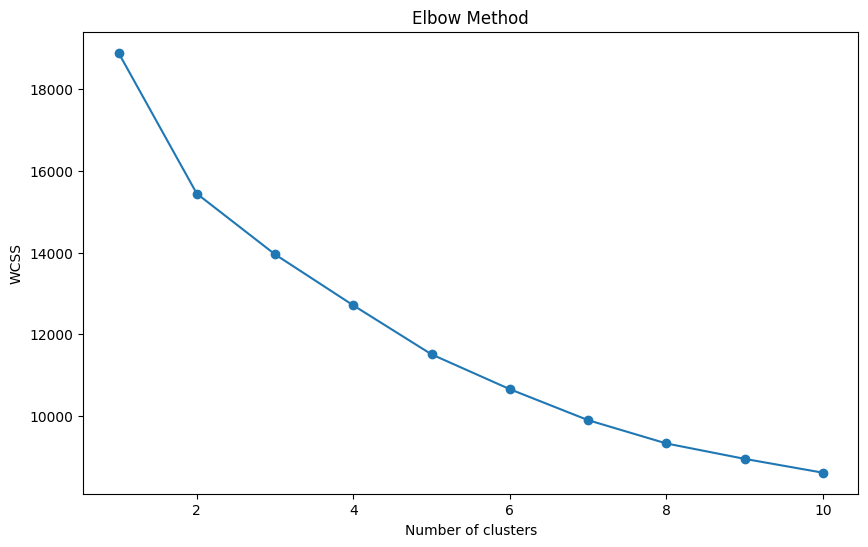

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age'])

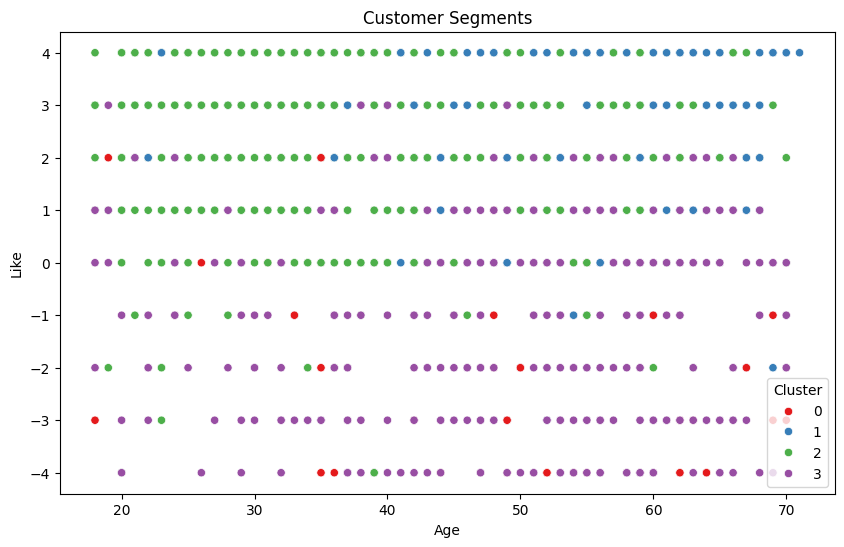

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Like', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments')
plt.show()

In [28]:
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
      yummy    convenient     spicy  fattening    greasy      fast     cheap  \
0  0.074380 -1.332268e-15  0.074380   0.859504  0.735537  0.636364  0.338843   
1  0.840336  9.705882e-01  0.130252   0.352941  0.046218  0.928571  0.739496   
2  0.941272  9.902121e-01  0.076672   0.991843  0.575856  0.938010  0.619902   
3  0.035343  1.000000e+00  0.101871   0.964657  0.648649  0.904366  0.567568   

      tasty  expensive   healthy  disgusting      Like        Age  
0  0.123967   0.644628  0.057851     0.77686 -0.223298  48.504132  
1  0.920168   0.189076  0.789916     0.02521  2.066450  49.407563  
2  0.957586   0.355628  0.106036     0.08646  2.076979  38.181077  
3  0.239085   0.372141  0.060291     0.41580 -0.550745  49.434511  


In [29]:
print("\nCluster Analysis:")
print(data.groupby('Cluster').mean())


Cluster Analysis:
            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.074380    0.000000  0.074380   0.859504  0.735537  0.636364   
1        0.840336    0.970588  0.130252   0.352941  0.046218  0.928571   
2        0.941272    0.990212  0.076672   0.991843  0.575856  0.938010   
3        0.035343    1.000000  0.101871   0.964657  0.648649  0.904366   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.338843  0.123967   0.644628  0.057851     0.77686 -1.980000   
1        0.739496  0.920168   0.189076  0.789916     0.02521  2.413408   
2        0.619902  0.957586   0.355628  0.106036     0.08646  2.250474   
3        0.567568  0.239085   0.372141  0.060291     0.41580 -0.858209   

               Age  VisitFrequency    Gender  
Cluster                                     

In [30]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

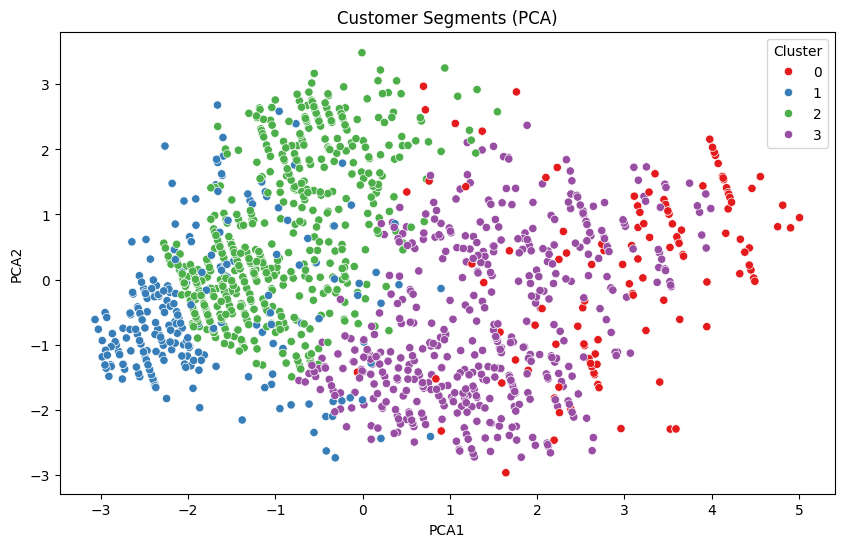

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments (PCA)')
plt.show()

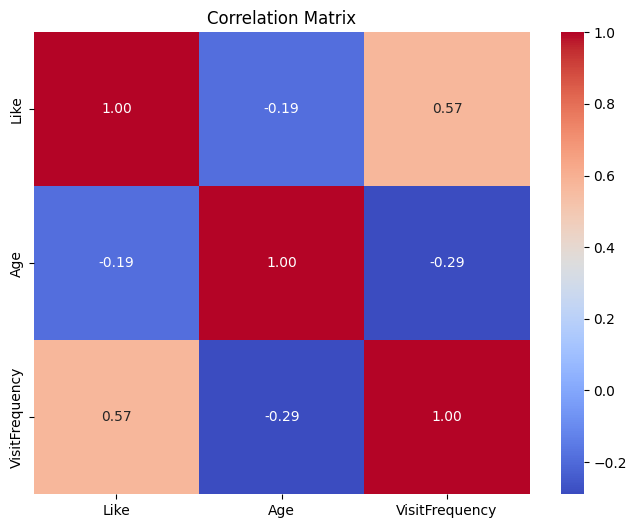

In [33]:
corr_matrix = data[['Like', 'Age', 'VisitFrequency']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
print(data[['Like', 'Age']].describe())
print("\nGender distribution:\n", data['Gender'].value_counts())
print("\nVisit Frequency distribution:\n", data['VisitFrequency'].value_counts())

              Like          Age
count  1158.000000  1453.000000
mean      1.013817    44.604955
std       2.355189    14.221178
min      -4.000000    18.000000
25%       0.000000    33.000000
50%       1.000000    45.000000
75%       3.000000    57.000000
max       4.000000    71.000000

Gender distribution:
 Gender
0    788
1    665
Name: count, dtype: int64

Visit Frequency distribution:
 VisitFrequency
3    439
2    342
1    252
4    235
0    131
5     54
Name: count, dtype: int64


In [35]:
numeric_columns = data.select_dtypes(include=['number']).columns
segment_means = data[numeric_columns].groupby('Cluster').mean()
print("\nSegment Means:\n", segment_means)


Segment Means:
             yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.074380    0.000000  0.074380   0.859504  0.735537  0.636364   
1        0.840336    0.970588  0.130252   0.352941  0.046218  0.928571   
2        0.941272    0.990212  0.076672   0.991843  0.575856  0.938010   
3        0.035343    1.000000  0.101871   0.964657  0.648649  0.904366   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.338843  0.123967   0.644628  0.057851     0.77686 -1.980000   
1        0.739496  0.920168   0.189076  0.789916     0.02521  2.413408   
2        0.619902  0.957586   0.355628  0.106036     0.08646  2.250474   
3        0.567568  0.239085   0.372141  0.060291     0.41580 -0.858209   

               Age  VisitFrequency    Gender      PCA1      PCA2  
Cluster                   

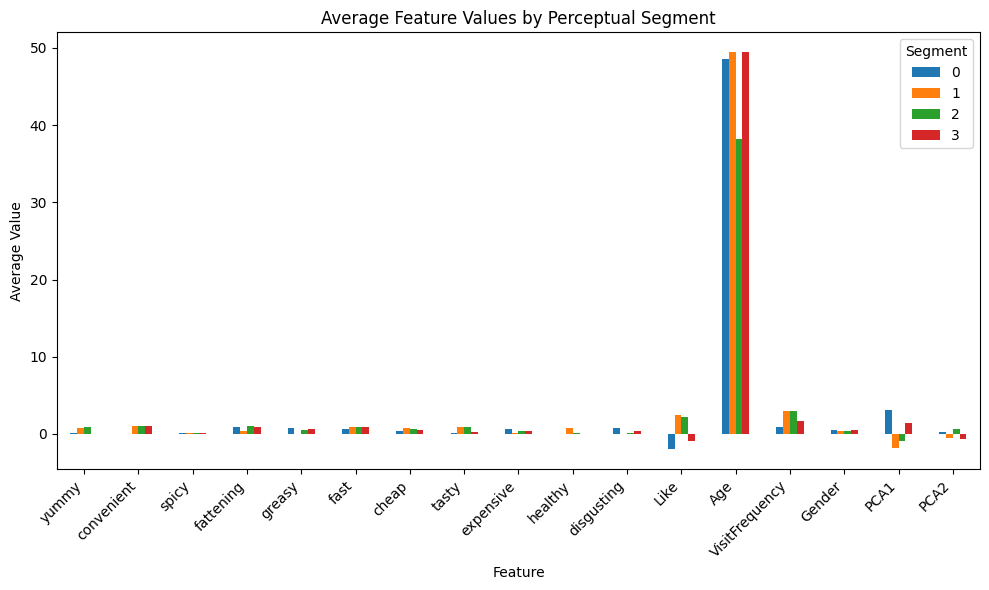

In [36]:
segment_means_t = segment_means.transpose()
segment_means_t.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values by Perceptual Segment')
plt.ylabel('Average Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

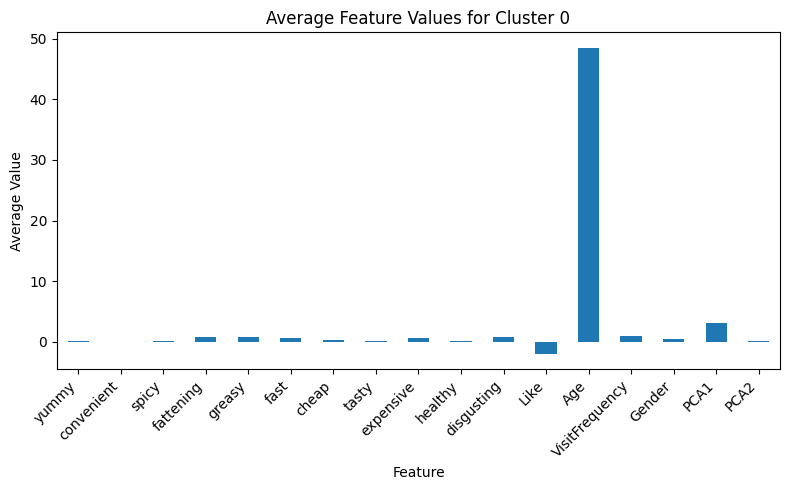

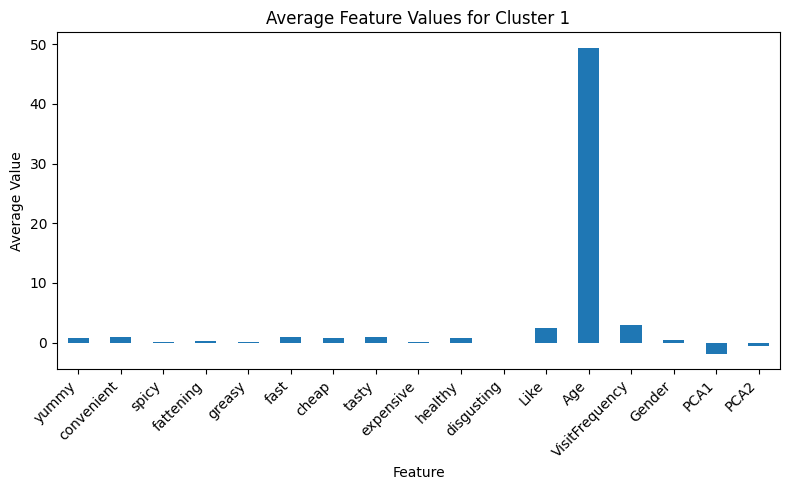

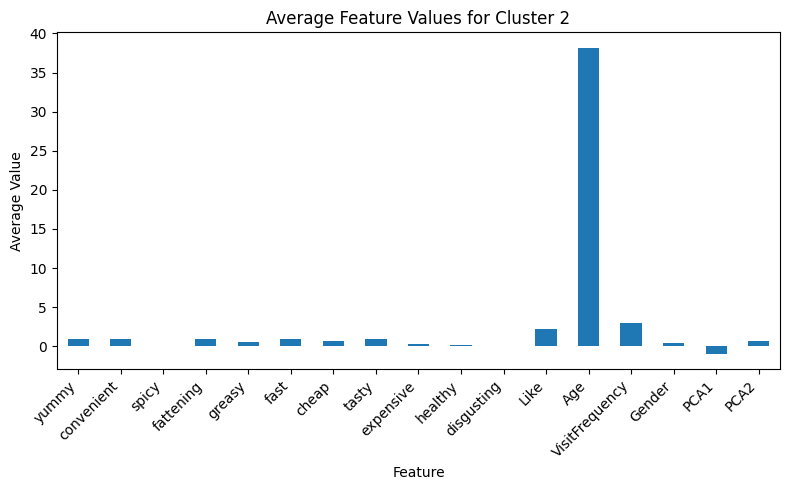

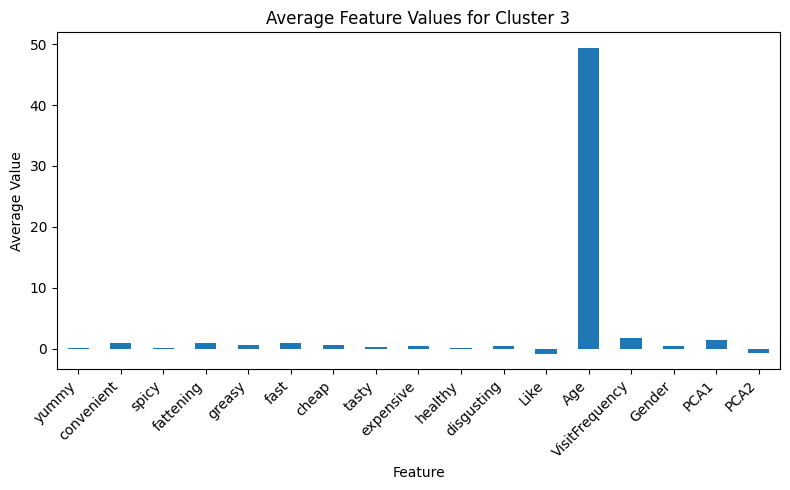

In [40]:
for cluster in segment_means.index:
    cluster_data = segment_means.loc[cluster]
    # A bar chart for the current cluster
    plt.figure()
    cluster_data.plot(kind='bar', figsize=(8, 5))
    plt.title(f'Average Feature Values for Cluster {cluster}')
    plt.ylabel('Average Value')
    plt.xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [41]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = [0, 0.1]

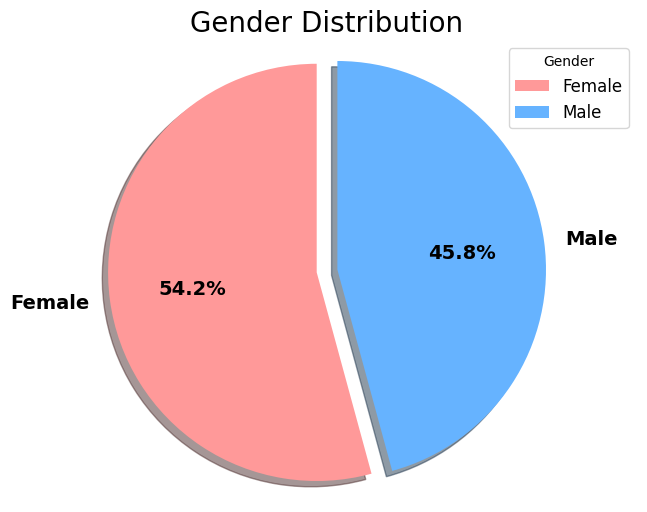

In [42]:
plt.figure(figsize=(8, 6))
plt.pie(size, colors=colors, explode=explode, labels=labels,
        shadow=True, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 14, 'weight': 'bold'})
plt.title('Gender Distribution', fontsize=20)
plt.axis('equal')
plt.legend(title='Gender', loc='upper right', fontsize=12)
plt.show()

<ipython-input-43-2536c07e6668>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2", kind="swarm")


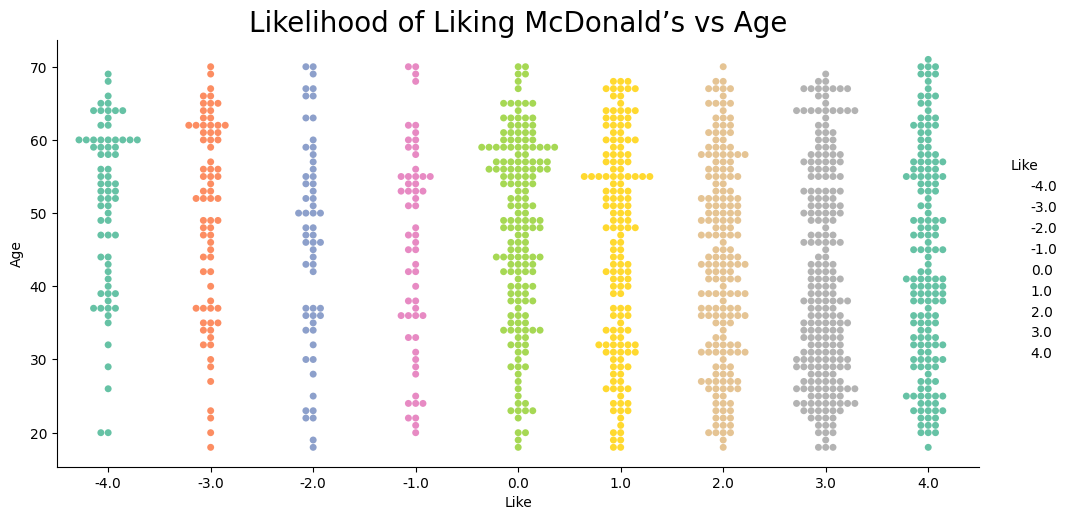

In [43]:
sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2", kind="swarm")
plt.title('Likelihood of Liking McDonald’s vs Age', fontsize=20)
plt.xlabel('Like')
plt.ylabel('Age')
plt.show()

<ipython-input-44-144ae284e3e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=data, palette='Set1')


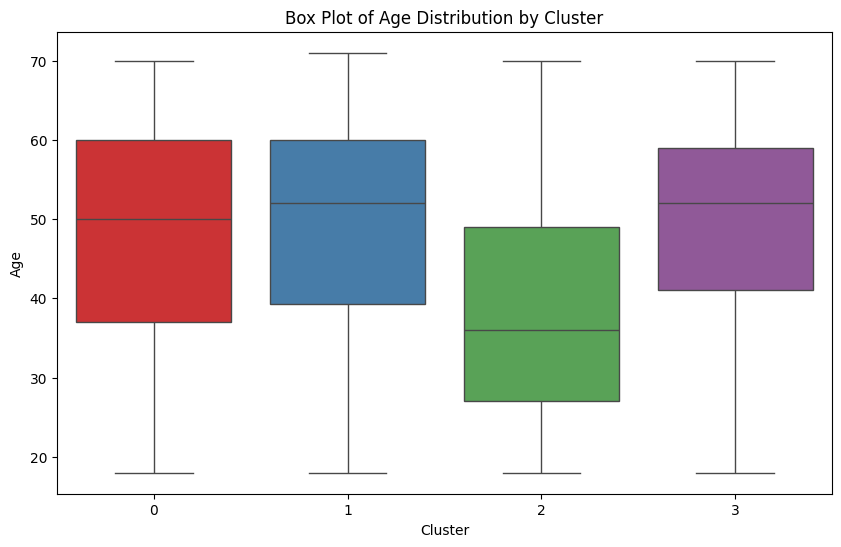

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data, palette='Set1')
plt.title('Box Plot of Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

**Categorize sentiment based on the "Like" column**

In [46]:
def categorize_sentiment(like_score):
    if like_score <= 0:
        return 'Negative'
    elif 1 <= like_score <= 3:
        return 'Neutral'
    else:
        return 'Positive'

data['Sentiment'] = data['Like'].apply(categorize_sentiment)

**Overall sentiment distribution**

<ipython-input-47-9eed0a076eab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='Set2')


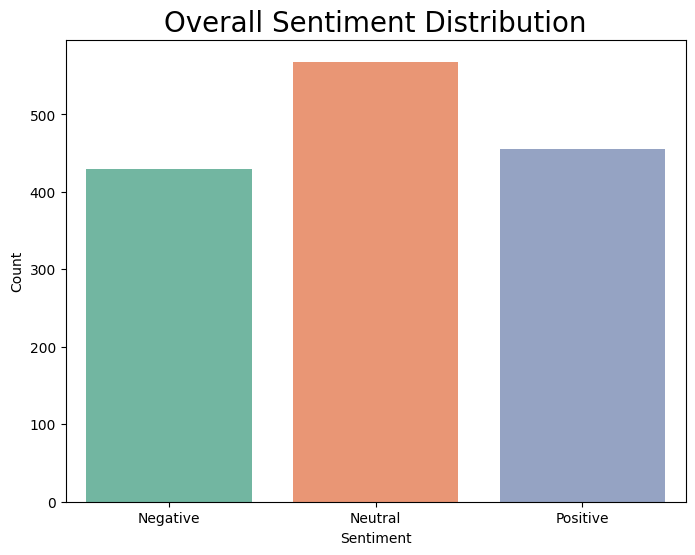

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Overall Sentiment Distribution', fontsize=20)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

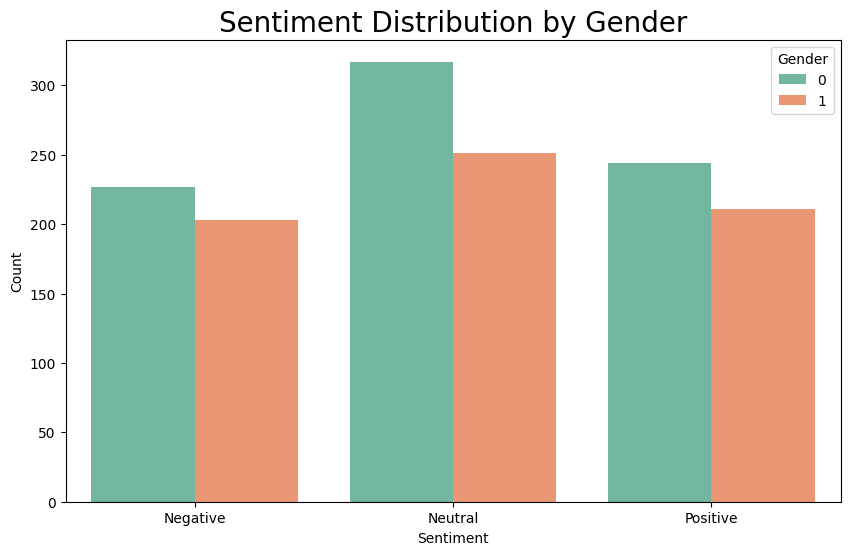

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', hue='Gender', data=data, palette='Set2')
plt.title('Sentiment Distribution by Gender', fontsize=20)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [49]:
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

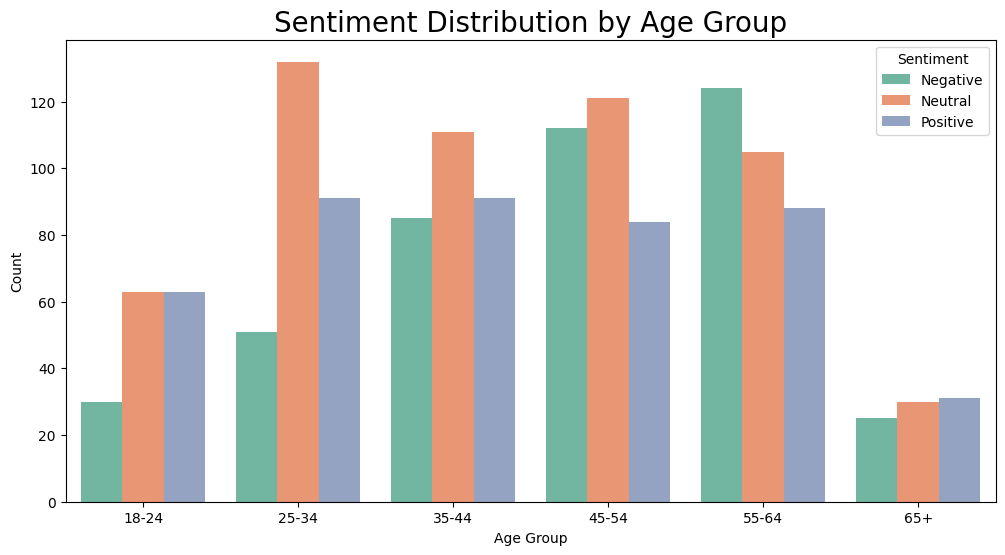

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution by Age Group', fontsize=20)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

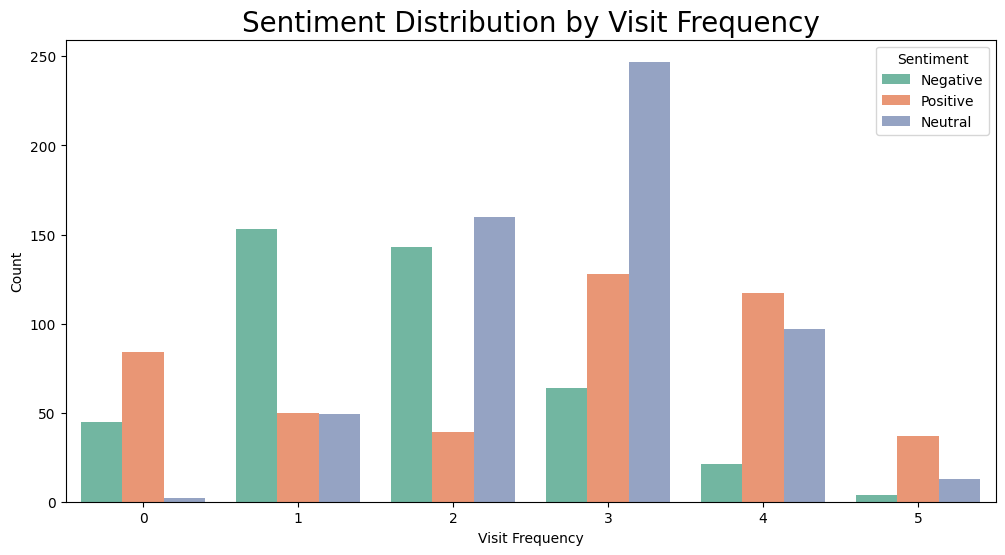

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='VisitFrequency', hue='Sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution by Visit Frequency', fontsize=20)
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [55]:
avg_sentiment_by_gender = data.groupby('Gender')['Like'].mean()
avg_sentiment_by_age_group = data.groupby('AgeGroup')['Like'].mean()
avg_sentiment_by_visit_freq = data.groupby('VisitFrequency')['Like'].mean()
print("Average Sentiment Score by Gender:\n", avg_sentiment_by_gender)
print("\nAverage Sentiment Score by Age Group:\n", avg_sentiment_by_age_group)
print("\nAverage Sentiment Score by Visit Frequency:\n", avg_sentiment_by_visit_freq)

Average Sentiment Score by Gender:
 Gender
0    1.043131
1    0.979323
Name: Like, dtype: float64

Average Sentiment Score by Age Group:
 AgeGroup
18-24    1.715517
25-34    1.660465
35-44    1.077922
45-54    0.667939
55-64    0.455253
65+      0.970149
Name: Like, dtype: float64

Average Sentiment Score by Visit Frequency:
 VisitFrequency
0   -2.191489
1   -1.039024
2    0.615625
3    2.057292
4    2.412791
5    2.933333
Name: Like, dtype: float64


<ipython-input-55-d00df44918ab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sentiment_by_age_group = data.groupby('AgeGroup')['Like'].mean()


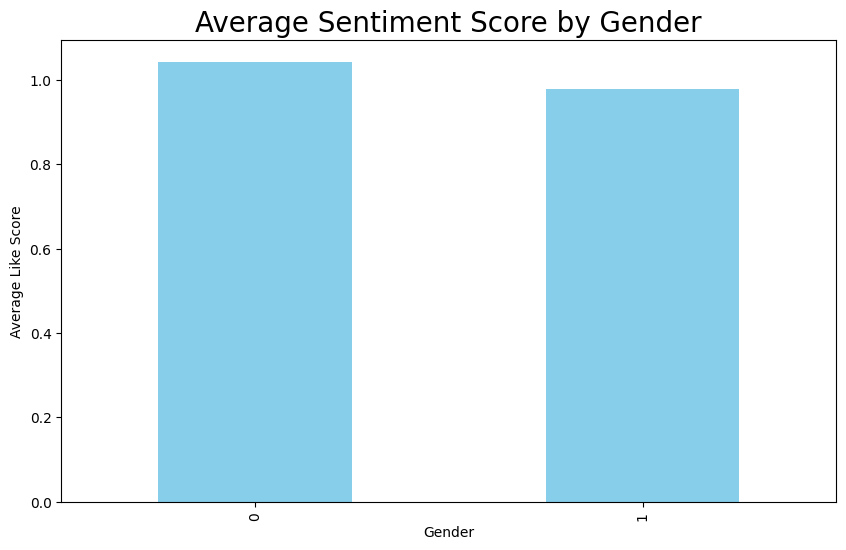

In [56]:
plt.figure(figsize=(10, 6))
avg_sentiment_by_gender.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Gender', fontsize=20)
plt.ylabel('Average Like Score')
plt.xlabel('Gender')
plt.show()

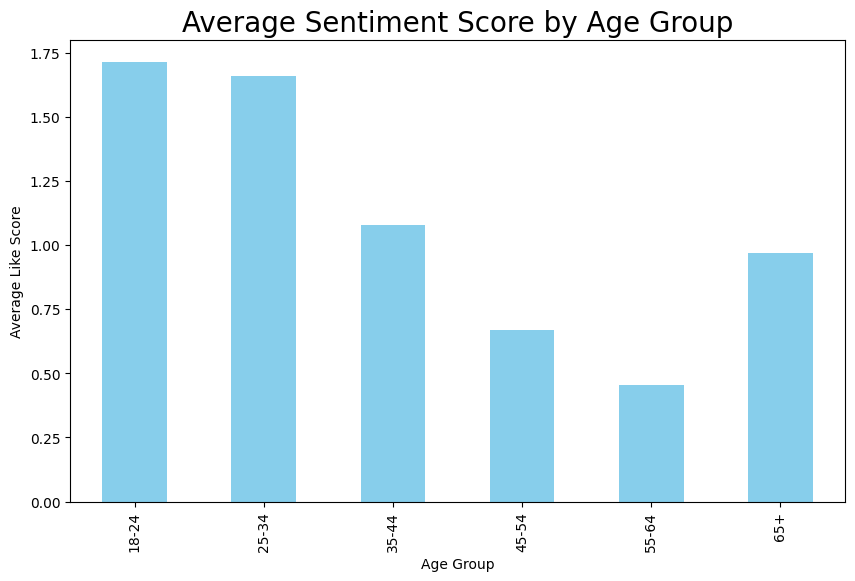

In [57]:
plt.figure(figsize=(10, 6))
avg_sentiment_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Age Group', fontsize=20)
plt.ylabel('Average Like Score')
plt.xlabel('Age Group')
plt.show()

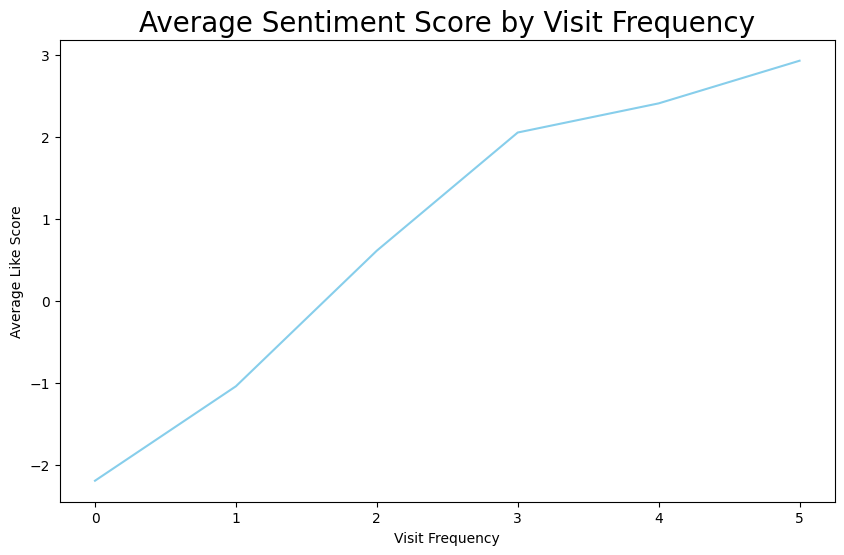

In [60]:
plt.figure(figsize=(10, 6))
avg_sentiment_by_visit_freq.plot(kind='line', color='skyblue')
plt.title('Average Sentiment Score by Visit Frequency', fontsize=20)
plt.ylabel('Average Like Score')
plt.xlabel('Visit Frequency')
plt.show()